<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
from pandas_datareader import data, wb
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import datetime as dt
import pandas as pd
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters() # Allow matplotlib have access to timestamp 
import matplotlib.ticker as mplticker

We will show how to convert monthly data into annual data in this note. We use inflation as our example.

In [89]:
# Retrieve data from FRED, check my notebook for pandareader's user guide
start = dt.datetime(1950, 1, 1)
end = dt.datetime.today()
df = pdr.data.DataReader(['FYFSGDA188S','CPIAUCSL'], 'fred', start, end)
df.columns = ['Fed Deficit Ratio', 'CPI']

In [90]:
df.head(13)

,Fed Deficit Ratio,CPI
DATE,,
1950-01-01,-1.04027,23.51
1950-02-01,NaN,23.61
1950-03-01,NaN,23.64
1950-04-01,NaN,23.65
1950-05-01,NaN,23.77
1950-06-01,NaN,23.88
1950-07-01,NaN,24.07
1950-08-01,NaN,24.20
1950-09-01,NaN,24.34


However $CPI$ is monthly data, we need to convert it into annual rate.

$$
\text{Monthly Inflation Rate:}\qquad \pi_t^M = \frac{P_t-P_{t-1}}{P_{t-1}}
$$

Then calculate annual inflation rate by
$$
\text{Annual Inflation Rate:} \qquad \pi_t^A=\prod_{t=1}^{12}(1+\pi_t^M)-1
$$

Calculate monthly inflation rate. For instance, the inflation rate in Feb 1950 is $0.425\%$.

In [91]:
df['InfRate'] = (CPI.pct_change()+1); df.head(5)

,Fed Deficit Ratio,CPI,InfRate
DATE,,,
1950-01-01,-1.04027,23.51,NaN
1950-02-01,NaN,23.61,1.004254
1950-03-01,NaN,23.64,1.001271
1950-04-01,NaN,23.65,1.000423
1950-05-01,NaN,23.77,1.005074


Calculate product of inflation in every month, which gives us YTD inflation rate.

In [92]:
df['YTD_InfRate'] = InfRate.groupby(pd.Grouper(freq='A')).cumprod(); df.head(5)

,Fed Deficit Ratio,CPI,InfRate,YTD_InfRate
DATE,,,,
1950-01-01,-1.04027,23.51,NaN,NaN
1950-02-01,NaN,23.61,1.004254,1.004254
1950-03-01,NaN,23.64,1.001271,1.005530
1950-04-01,NaN,23.65,1.000423,1.005955
1950-05-01,NaN,23.77,1.005074,1.011059


Extract the first day of the year to be the annual inflation rate.

In [96]:
df['InfRateA'] = YTD_InfRate.loc[(ts.index.month == 1) & (ts.index.day == 1)]; df.head(25)

,Fed Deficit Ratio,CPI,InfRate,YTD_InfRate,InfRateA
DATE,,,,,
1950-01-01,-1.04027,23.51,NaN,NaN,NaN
1950-02-01,NaN,23.61,1.004254,1.004254,NaN
1950-03-01,NaN,23.64,1.001271,1.005530,NaN
1950-04-01,NaN,23.65,1.000423,1.005955,NaN
1950-05-01,NaN,23.77,1.005074,1.011059,NaN
1950-06-01,NaN,23.88,1.004628,1.015738,NaN
1950-07-01,NaN,24.07,1.007956,1.023820,NaN
1950-08-01,NaN,24.20,1.005401,1.029349,NaN
1950-09-01,NaN,24.34,1.005785,1.035304,NaN


In [99]:
df['InfRateA'] = (df['InfRateA']-1)*100

In [127]:
df_new = df[['Fed Deficit Ratio', 'InfRateA']]

In [126]:
df_new_A = df_new.dropna();df_new_A.head(30)

,Fed Deficit Ratio,InfRateA
DATE,,
1951-01-01,1.75894,1.601281
1952-01-01,-0.41351,-0.075557
1953-01-01,-1.66822,-0.262074
1954-01-01,-0.29548,0.260514
1955-01-01,-0.70344,0.000000
1956-01-01,0.87837,-0.148865
1957-01-01,0.71977,0.144770
1958-01-01,-0.57540,0.597120
1959-01-01,-2.46313,0.138074


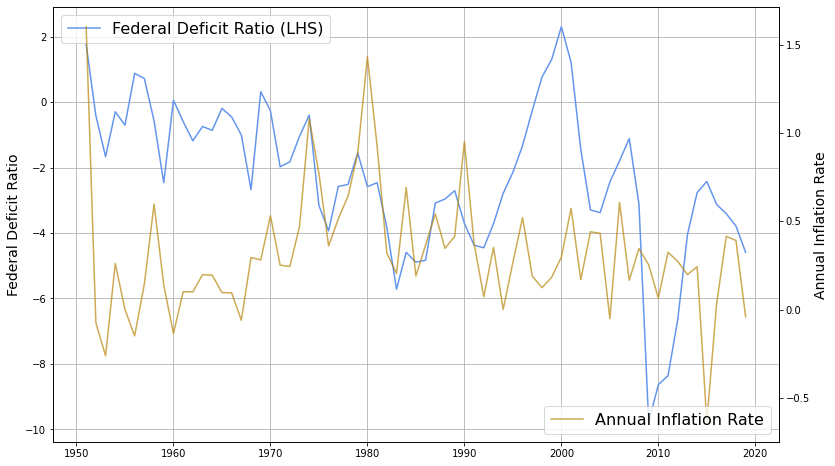

In [118]:
fig, ax = plt.subplots(figsize = (13, 8))


ax.plot(df_new_A['Fed Deficit Ratio'], color = 'CornflowerBlue',
        alpha = 1, label = 'Federal Deficit Ratio (LHS)')
ax.set_ylabel('Federal Deficit Ratio', size = 14)

ax_RHS = ax.twinx() # share the same x-axis
ax_RHS.plot(df_new_A['InfRateA'], color = 'DarkGoldenRod', alpha = .7, 
            label = 'Annual Inflation Rate')
ax_RHS.set_ylabel('Annual Inflation Rate', size = 14)

ax.legend(fontsize = 16)
ax_RHS.legend(fontsize = 16, loc = 'lower right')
ax.grid()
plt.show()

In [103]:
InfRateA

,CPIAUCSL
DATE,
1950-01-01,NaN
1951-01-01,0.016013
1952-01-01,-0.000756
1953-01-01,-0.002621
1954-01-01,0.002605
...,...
2016-01-01,0.000278
2017-01-01,0.004141
2018-01-01,0.003910


In [119]:
start = dt.datetime(1950, 1, 1)
end = dt.datetime.today()
InflationA = pdr.data.DataReader(['FPCPITOTLZGUSA'], 'fred', start, end)

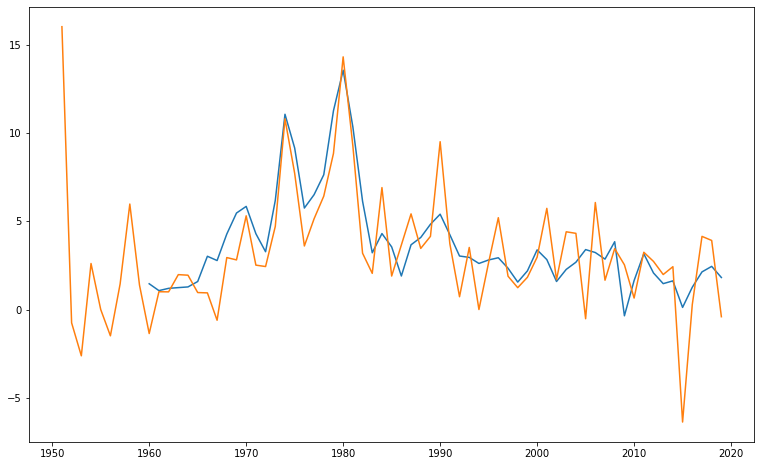

In [128]:
fig, ax = plt.subplots(figsize = (13, 8))
ax.plot(InflationA)
ax.plot(df_new_A['InfRateA']*10)